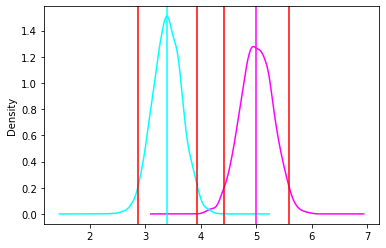

In [9]:
from resamples import par_mc_samples
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame([[1,2],[3,2],[5,6],[7,7],[9,0]])
df.columns = ['a','b']

original_sample_means = df.mean()


pooled_sample = pd.concat(df['a'],df['b'],axis=0)

resampled_df = par_mc_samples(pooled_sample,10,250,replace = True)
resampled_means_for_each_rep = resampled_df.mean().compute()
sample_distribution_means = resampled_df.mean().mean().compute()

std_errors = resampled_df.mean().std().compute()
resampled_df['a'].mean().compute().plot.density(color='fuchsia')
resampled_df['b'].mean().compute().plot.density(color = 'aqua')

plt.axvline(original_sample_means['a'],color = 'fuchsia')
#plt.axvline(sample_distribution_means['a'] + std_errors['a'],color='y')
#plt.axvline(sample_distribution_means['a'] - std_errors['a'],color='y')
plt.axvline(sample_distribution_means['a'] + 2 * std_errors['a'],color='r')
plt.axvline(sample_distribution_means['a'] - 2 * std_errors['a'],color='r')

plt.axvline(original_sample_means['b'],color = 'aqua')
#plt.axvline(sample_distribution_means['b'] + std_errors['b'],color='y')
#plt.axvline(sample_distribution_means['b'] - std_errors['b'],color='y')
plt.axvline(sample_distribution_means['b'] + 2 * std_errors['b'],color='r')
plt.axvline(sample_distribution_means['b'] - 2 * std_errors['b'],color='r')

plt.show()